## 4.7 示例：随机漫步

> 我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。
> 
> 下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步：

In [17]:
import random


position = 0
walk = [position]  # 步行记录
steps = 1000


for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

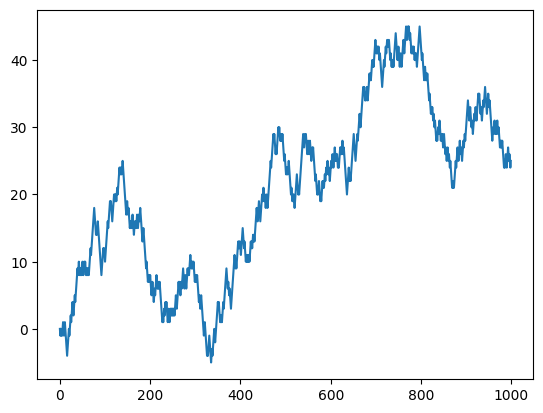

In [19]:
import matplotlib.pyplot as plt


# 图4-4是根据前100个随机漫步值生成的折线图：
plt.plot(walk[:1000])

> 不难看出，这其实就是随机漫步中各步的累计和，可以用一个数组运算来实现。因此，我用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或－1，然后计算累计和：

In [22]:
import numpy as np


nsteps = 1000

draws = np.random.randint(0, 2, size=nsteps)

steps = np.where(draws > 0, 1, -1)


# 累加
walk = steps.cumsum()

In [24]:
print("行走步数记录: ")
steps

array([ 1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1

In [25]:
print("每次行走, 距离起点路长: ")
walk

每次行走, 距离起点路长: 


array([  1,   0,   1,   0,  -1,  -2,  -3,  -4,  -3,  -4,  -3,  -2,  -1,
        -2,  -1,   0,   1,   2,   1,   0,   1,   0,   1,   2,   3,   4,
         3,   2,   1,   2,   3,   4,   3,   2,   1,   0,  -1,  -2,  -3,
        -2,  -1,  -2,  -1,   0,  -1,  -2,  -3,  -4,  -3,  -4,  -3,  -2,
        -3,  -4,  -5,  -6,  -7,  -6,  -7,  -6,  -5,  -6,  -7,  -8,  -7,
        -6,  -5,  -4,  -3,  -4,  -3,  -2,  -3,  -4,  -5,  -6,  -5,  -6,
        -7,  -8,  -9,  -8,  -9, -10, -11, -12, -11, -10,  -9,  -8,  -9,
        -8,  -9, -10, -11, -10,  -9,  -8,  -9, -10, -11, -10,  -9, -10,
       -11, -10,  -9, -10, -11, -10, -11, -10, -11, -10, -11, -12, -11,
       -10, -11, -12, -13, -12, -11, -12, -11, -12, -13, -14, -13, -12,
       -13, -12, -11, -12, -11, -12, -11, -12, -13, -12, -11, -10, -11,
       -10, -11, -10,  -9, -10,  -9, -10, -11, -12, -11, -10, -11, -12,
       -11, -10, -11, -10,  -9, -10,  -9, -10,  -9, -10, -11, -12, -11,
       -10,  -9, -10,  -9, -10,  -9, -10, -11, -10, -11, -12, -1

In [9]:
print(walk.min())

print(walk.max())

-51
3


> 现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想要知道的是第一个10或－10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）：

In [26]:
(np.abs(walk) >= 10).argmax()

83

In [27]:
(np.abs(walk) >= 10)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,